In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
import scipy 
from scipy import integrate
import numpy as np
from matplotlib import style
import random
style.use('default')

In [28]:
I=np.random.default_rng(100)
print(I)

Generator(PCG64)


In [29]:
N=I.uniform(0,1, 100)

(array([ 2.,  5.,  3.,  4.,  2.,  5.,  5.,  6.,  3.,  2., 10., 11.,  4.,
         8.,  5.,  6.,  3.,  4.,  2., 10.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

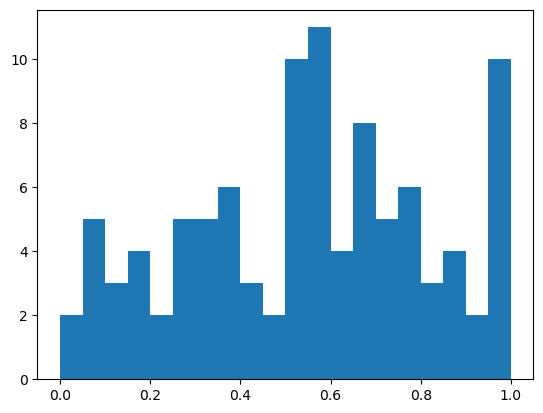

In [30]:
plt.hist(N, bins=20, range=(0,1))

In [46]:
G=I.normal(15, 1, 1000)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,
         4., 14., 16., 26., 29., 28., 44., 45., 61., 69., 68., 80., 77.,
        67., 75., 62., 56., 64., 36., 22., 20., 14., 10.,  1.,  1.,  2.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. ,
        12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. , 14.2,
        14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2, 16.4,
        16.6, 16.8, 17. , 17.2, 17.4, 17.6, 17.8, 18. , 18.2, 18.4, 18.6,
        18.8, 19. , 19.2, 19.4, 19.6, 19.8, 20. ]),
 <a list of 50 Patch objects>)

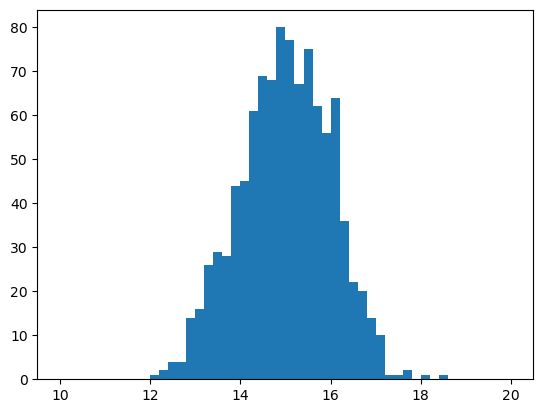

In [47]:
plt.hist(G, bins=50, range=(10, 20))

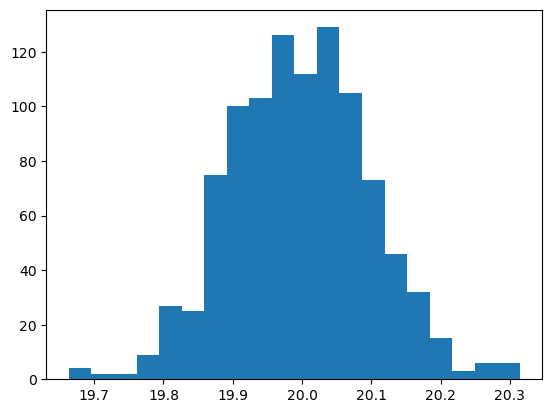

In [59]:
plt.hist(GaussianGenerator(1000, 20, 0.1), bins=20);

In [34]:
def MyGaussian(x, m, s):
    return 1/(np.sqrt(2*np.pi)*s)*np.exp(-1/2*(((x-m)/s)**2))

In [35]:
arr=np.linspace(10,20,100)
g=MyGaussian(arr, 15, 1.0)

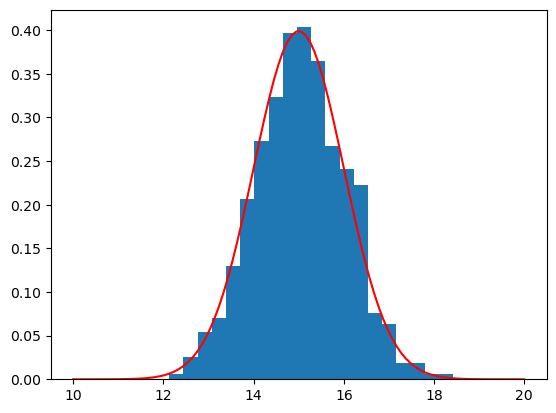

In [45]:
plt.hist(G, bins=20, density=True)
plt.plot(arr, g, c="r")

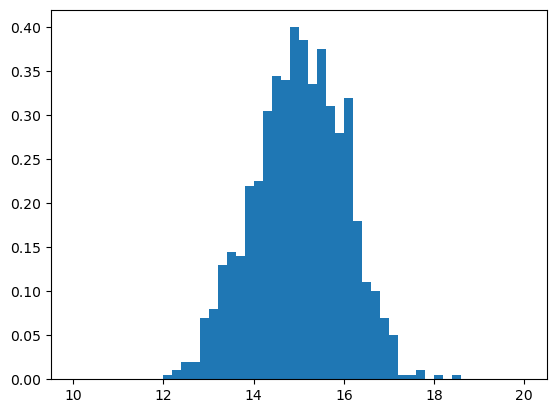

In [48]:
h, xedges, patches = plt.hist(G, bins=50, range=(10, 20), density=True)
xcenters = (xedges[:-1] + xedges[1:]) / 2

array([15.04978017,  1.03786558])

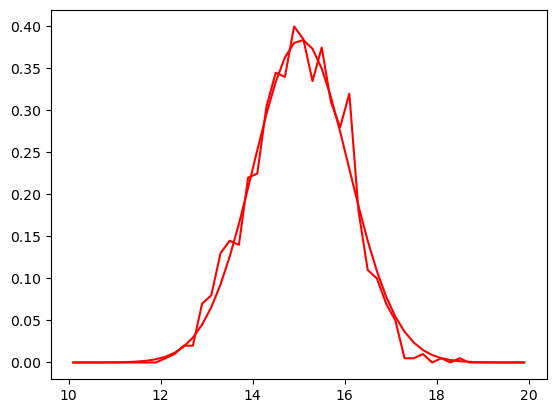

In [50]:
popt, pcov = scipy.optimize.curve_fit(MyGaussian, xcenters, h, bounds=([14, 0.5], [16, 1.5]))
plt.plot(xcenters, MyGaussian(xcenters, *popt), 'r-')
plt.plot(xcenters, h, 'r-')
popt

In [57]:
def run_trial(switch_doors, ndoors):

    # Pick a random door out of the ndoors available
    chosen_door = random.randint(1, ndoors)
    if switch_doors:
        # Reveal a goat
        revealed_door = 3 if chosen_door==2 else 2
        # Make the switch by choosing any other door than the initially-
        # selected one and the one just opened to reveal a goat. 
        available_doors = [dnum for dnum in range(1,ndoors+1)
                                if dnum not in (chosen_door, revealed_door)]
        chosen_door = random.choice(available_doors)

    # You win if you picked door number 1
    return chosen_door == 1

def run_trials(ntrials, switch_doors, ndoors=3):

    nwins = 0
    for i in range(ntrials):
        if run_trial(switch_doors, ndoors):
            nwins += 1
    return nwins

ndoors, ntrials = 3, 10000
nwins_without_switch = run_trials(ntrials, False, ndoors)
nwins_with_switch = run_trials(ntrials, True, ndoors)

print('Monty Hall Problem with {} doors'.format(ndoors))
print('Proportion of wins without switching: {:.4f}'
            .format(nwins_without_switch/ntrials))
print('Proportion of wins with switching: {:.4f}'
            .format(nwins_with_switch/ntrials))

Monty Hall Problem with 3 doors
Proportion of wins without switching: 0.3308
Proportion of wins with switching: 0.6644
